분류 성능비교
==

다루는 내용
--
- 분류 알고리즘 비교
- 교차검증
- 정적 성능평가 Confusion matrix  
- 동적 성능평가 ROC

데이터
--
- 포도주 품질 분류 https://goo.gl/Gyc8K7

출처
--
https://www.kaggle.com/vishalyo990/prediction-of-quality-of-wine/notebook



모듈 불러오기
--

In [259]:
import pandas as pd
import numpy as np
# import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score 
%matplotlib inline

데이터 읽기 (포도주 품질 평가)
--

In [260]:
wine = pd.read_csv('../data/winequality-red.csv')
# 데이터 사본 https://goo.gl/m3eCrf

In [261]:
wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [262]:
wine.shape

(1599, 12)

- fixed acidity - 결합 산도 
- volatile acidity - 휘발성 산도 
- citric acid - 시트르산 
- residual sugar - 잔류 설탕 
- chlorides	 - 염화물 
- free sulfur dioxide - 자유 이산화황 
- total sulfur dioxide - 총 이산화황 
- density - 밀도 
- pH - pH 
- sulphates - 황산염 
- alcohol - 알코올 
- quality - 품질 (0 ~ 10 점)

In [263]:
wine.info() # 데이터 정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [264]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

## 여러 특성 한번에 보기 (박스 플롯)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 12 Text xticklabel objects>)

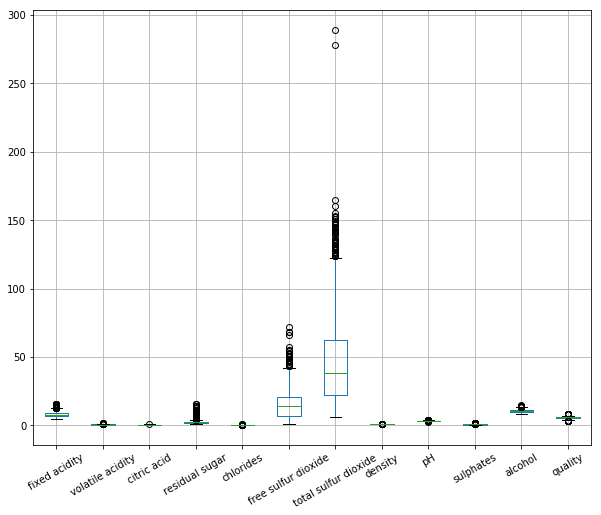

In [265]:
#맨처음에 박스플롯을 그린다 거의 한눈에 다보여주기 때문에
wine.boxplot(figsize = (10,8))
plt.xticks(rotation=30) #글씨 30도 기우리기

줄여서 보기
--

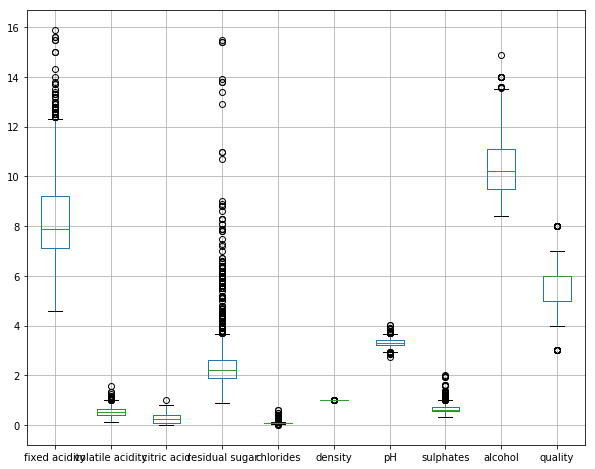

In [266]:
#위에서 크게나온 그림 빼고 다시그림 다른것들을 자세히 보기위해서
wine.drop(['free sulfur dioxide', 'total sulfur dioxide'], axis=1).boxplot(figsize = (10,8))

In [267]:
wine[['alcohol', 'quality']].head(10)

,alcohol,quality
0,9.4,5
1,9.8,5
2,9.8,5
3,9.8,6
4,9.4,5
5,9.4,5
6,9.4,5
7,10.0,7
8,9.5,7
9,10.5,5


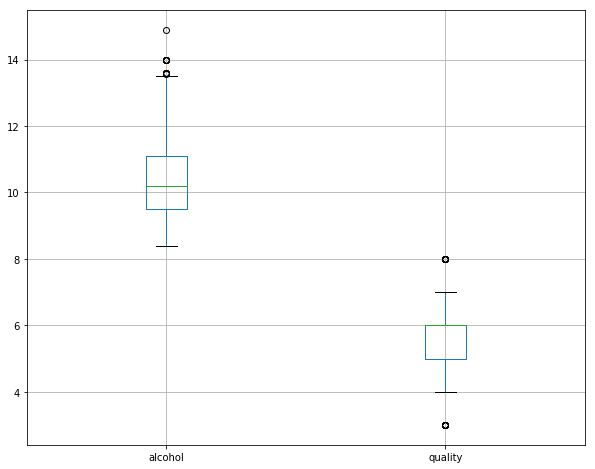

In [268]:
wine[['alcohol', 'quality']].boxplot(figsize = (10,8))

히스토그램
--

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A1FABA39E8>,
      dtype=object)

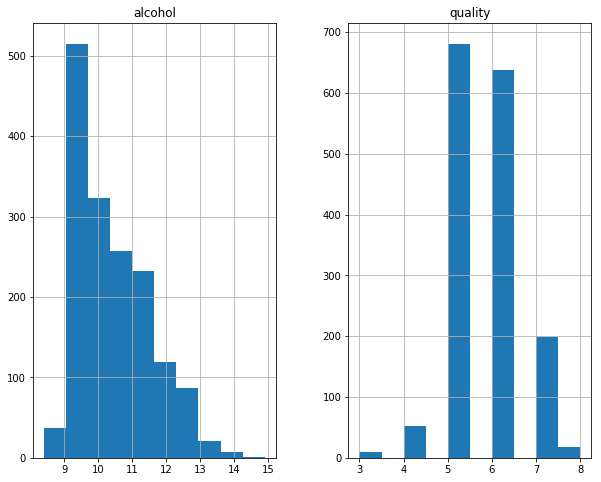

In [269]:
wine[['alcohol', 'quality']].hist(figsize = (10,8))

품질관련 데이터 파악
--

C:\Users\MH\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


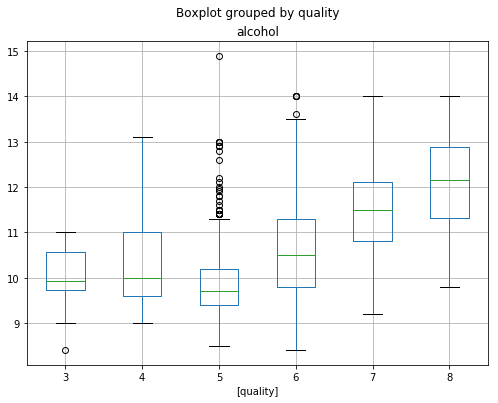

In [270]:
#퀄리티가 3인것만 모아서 그리고 4만모아서 그리고...
wine[['alcohol', 'quality']].boxplot(by='quality',figsize = (8,6))
#quality가 좋은건 평균적으로 알코올 성분이 좋다.
#포도주도 알코올이 있는것들을 좋아함

C:\Users\MH\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A1FB147EF0>,
      dtype=object)

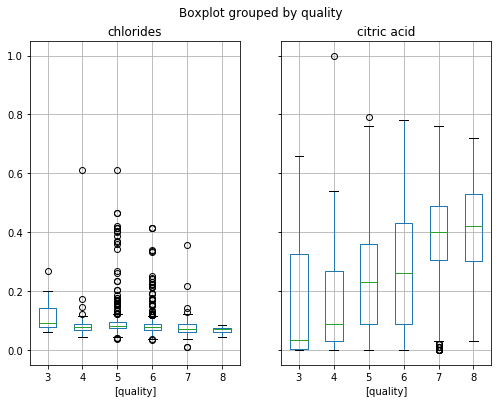

In [271]:
#chlorides : 염화물 , citric acid : 시트르산
wine1 = wine[[ 'chlorides', 'citric acid', 'quality']]
wine1.boxplot(by='quality',figsize = (8,6))

C:\Users\MH\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A1FB491080>,
      dtype=object)

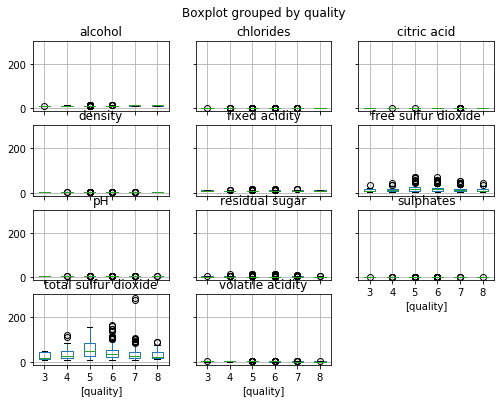

In [272]:
wine.boxplot(by='quality',figsize = (8,6))

C:\Users\MH\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A1FBD11978>,
      dtype=object)

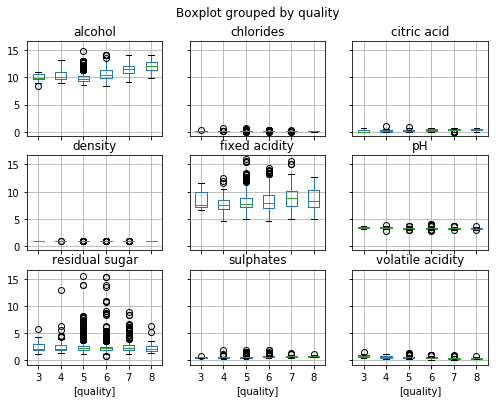

In [273]:
wine.drop(['free sulfur dioxide', 'total sulfur dioxide'], axis=1).boxplot(by='quality',figsize = (8,6))

C:\Users\MH\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A1FD45B6D8>,
      dtype=object)

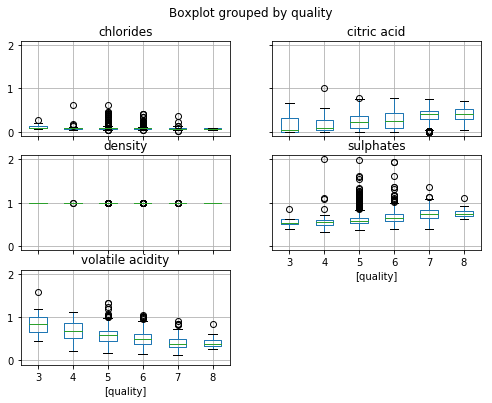

In [274]:
wine.drop(['free sulfur dioxide', 'total sulfur dioxide','alcohol','fixed acidity','residual sugar','pH'], axis=1).boxplot(by='quality',figsize = (8,6))

## 데이터 전처리 (레이블 만들기)

In [275]:
wine['quality'].unique() 

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [276]:
wine.quality.unique() 

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [277]:
wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [278]:
# 품질이 좋고 나쁜 것을 나누는 기준 설정
# 6.5를 기준으로 bad(0) good(1)으로 나눈다 (임의로 나눈 것임)
bins = (2.9, 6.5, 8.1)#bins 구간을 나눌때 쓴다.(마지막에 8을썼더니 컴퓨터나 8을 뺴버렸다. 그래서 8을 포함시키기 위해 안전하게 8.1을 사용)
#8만 잡게하면 성능이 좋아진다.
group_names = [0, 1]
wine['qual'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [279]:
wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [280]:
wine['qual'].value_counts()

0    1382
1     217
Name: qual, dtype: int64

In [281]:
# 예측변수와 레이블을 나눈다
# X 데이터에서는 'quality'와 'qual' 컬럼 제거
# y는 레이블만 담는다

X_new = wine.drop(['quality', 'qual'], axis = 1) 
y = wine['qual'] 

In [282]:
X_new.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [283]:
y.value_counts()

0    1382
1     217
Name: qual, dtype: int64

표준 스케일링
--

스케일러가 하는 일 : 전체 자료의 분포를 평균 0, 분산 1이 되도록 만든다.  
X에는 수치 데이터만 들어야 한다.  
테스트 데이터도 같이 스케일링하는 것을 잊지 않는다

In [284]:
sc = StandardScaler()
X = sc.fit_transform(X_new)
#fit을 하고 transform을 한번에 한것, 코드를 줄여주기 위해서
#fit은 데이터를 읽고 평균과 시그마를 구한다. (하나의 모델을 만듬, 여기에 들어가는 파라미터가 평균과 시그마) -> 스케일링 하기위한 상수구하기
#transform은 실제 값들을 넣어서 나오는 값들

#원래는 데이터를 자체적으로 나눠서 cross valredation을 해야한다. 하지만 지금은 통으로했다.

In [285]:
# 데이터 프레임에 스케일링 연산을 하면 ndarray로 바뀐다
X[:5]

array([[-0.52835961,  0.96187667, -1.39147228, -0.45321841, -0.24370669,
        -0.46619252, -0.37913269,  0.55827446,  1.28864292, -0.57920652,
        -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228,  0.04341614,  0.2238752 ,
         0.87263823,  0.62436323,  0.02826077, -0.7199333 ,  0.1289504 ,
        -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, -0.16942723,  0.09635286,
        -0.08366945,  0.22904665,  0.13426351, -0.33117661, -0.04808883,
        -0.58477711],
       [ 1.65485608, -1.38444349,  1.4841536 , -0.45321841, -0.26496041,
         0.10759209,  0.41150046,  0.6642772 , -0.97910442, -0.46118037,
        -0.58477711],
       [-0.52835961,  0.96187667, -1.39147228, -0.45321841, -0.24370669,
        -0.46619252, -0.37913269,  0.55827446,  1.28864292, -0.57920652,
        -0.96024611]])

In [286]:
# 데이터를 랜덤하게 섞은 후 80%를 훈련데이터로 사용
# random_state 같은 값으로 지정하면 랜덤하게 섞이는 순서가 같다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

#직접 실습을 해보는데 지금은 80%이지만 다르게 할 수도 있다.
#위에 모델을 바꿔서 6.5가 맛있다가 아니라 8만 맛있다 등 바꿔본다.

In [287]:
X_train.shape, y_train.shape

((1279, 11), (1279,))

In [288]:
X_test.shape, y_test.shape

((320, 11), (320,))

## KNN(K-최근접 이웃)

In [289]:
clf = KNeighborsClassifier(n_neighbors=3)
clf = clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.8875

## 선형 모델(확률적 경사 하강법 사용)

In [290]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
sgd.score(X_test,y_test)

C:\Users\MH\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.865625

결정 트리 (Decesion Tree)
--

In [291]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.865625

## 랜덤 포래스트 (Random Forest Classifier)

In [292]:
rfc = RandomForestClassifier(n_estimators=300) 
rfc.fit(X_train, y_train)
rfc.score(X_test,y_test)

0.89375

##  정적 평가, 혼돈 매트릭스 (confusion_matrix)

In [293]:
pred_rfc = rfc.predict(X_test)
confusion_matrix(y_test, pred_rfc)
# RandomForest에 대한 confusion_matrix

array([[262,  17],
       [ 17,  24]], dtype=int64)

아래는 모델이 올바르게 예측했는지를 평가하기 위한 값들이다

In [294]:
# 여러 성능 지표를 출력한다
print(classification_report(y_test, pred_rfc))
#밑에 숫자는 0을 기준으로 0.94 맞춤 
#pos 긍정이 아닌 내가 찾고자 하는 답을 pos라고 봄(암환자)

             precision    recall  f1-score   support

          0       0.94      0.94      0.94       279
          1       0.59      0.59      0.59        41

avg / total       0.89      0.89      0.89       320



- Precision  = 모델이 옳다고 한 것이 실제로 옳은 비율     TP / ( TP + FP ) 
- Recall =  실제 정답인 것들 중, 모델이 정답이라고 예측한 것    TP / TP+FN
- f1-score = Precision과 Recall의 조화평균  (2 x  Precision x Recall ) /  (Precision + Recall)
- support는 이 모델에서 응답한 샘플의 수이다

## Support Vector Classifier (SVC)

In [295]:
svc = SVC()
svc.fit(X_train, y_train)
svc.score(X_test,y_test)

0.8875

Logistic Regression
--

In [296]:
log = LogisticRegression()
log.fit(X_train, y_train)
log.score(X_test,y_test)

0.88125

## Cross validation(교차 검증)

In [297]:
#rfc 랜덤포레스트 모델 위에 변수로 선언해줌(제일 잘나와서)
# estimator = 모델, cv는 분할 테스트 숫자
rfc_eval = cross_val_score(rfc, X = X, y = y, cv = 5)  
rfc_eval  # 5번의 교차 검증 결과를 보여준다

array([0.87538941, 0.84423676, 0.87774295, 0.86206897, 0.87774295])

In [298]:
rfc_eval.mean()

0.8674362054316938

Percentile Test
==

분류 성능 평가 (정적)
--

In [299]:
from itertools import cycle
from sklearn import svm, datasets
import sklearn.metrics 
from sklearn.preprocessing import label_binarize
from scipy import interp

In [300]:
X.shape, y.shape

((1599, 11), (1599,))

선형모델
--

In [301]:
classifier = SGDClassifier()
y_score = classifier.fit(X_train, y_train).decision_function(X_test)#decision_function() 어떤 클래스라고 분류한 확률을 리턴해줌
print(classifier.score(X_test, y_test))
y_score

0.85


C:\Users\MH\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([-20.11182553, -19.84072669,  -1.39704455, -22.61534245,
       -11.33809744, -17.98351029, -14.54739505,   1.85794213,
       -29.56813682, -39.30943645,  -7.46755084,  -6.30910173,
        -1.03372717, -26.86063784, -26.05528221, -38.50349971,
       -12.20013677, -29.94015871,  -6.69096573,   2.26567686,
       -11.89339396, -41.15515363, -22.75857772, -14.48655805,
       -32.36647692,   9.99490473, -15.88693842, -33.92425648,
       -11.7721987 , -32.67776797, -18.11159201, -38.86451258,
       -22.2652899 ,  -8.1105623 , -32.54746865, -39.60637646,
       -17.04350568, -30.21712871, -11.73885189, -39.77393823,
       -32.62202892,  -0.47831038,  -2.66417729, -14.35154102,
         5.99388623, -23.43799971, -12.30593709,  -6.48213483,
        -4.07046796,   3.69223557,  -7.16685987, -20.75465132,
         0.66871048,  11.02490161,  -7.41385256,  -1.58199719,
       -13.0004618 , -11.70876351, -26.56340488,  14.56569386,
       -25.31947901,  -7.61781007,  -5.09370344, -22.38

ROC로 성능 평가 (맞춘 순서를 평가)
--

In [302]:
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

#roc_auc는 그래프의 넓이를 구한다. 초반에 빨리 올라가면 면적이 넓다.
#가장 낮은건 평균인 0.5, 최대는 1이 된다.
roc_auc

0.8424687472681178

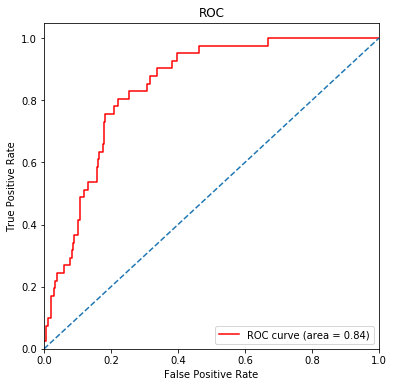

In [303]:
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='r', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")

# ROC그림 실습해보기

In [1]:
score = cross_val_score(model, X_train, y_train, scoring="roc_auc").mean()

NameError: name 'cross_val_score' is not defined